Historical Weights
Name       Weight Return    Dev    Correlations
XOM         16.0%  -2.0%  19.0%    1.000 
AAPL        15.6%  20.9%  24.7%    0.347 1.000 
MSFT        11.3%  30.8%  23.4%    0.391 0.563 1.000 
JNJ          9.7%   9.1%  16.1%    0.412 0.312 0.409 1.000 
GE           9.4% -12.5%  27.7%    0.348 0.277 0.280 0.219 1.000 
GOOG        11.6%  18.6%  24.1%    0.335 0.507 0.648 0.341 0.259 1.000 
CVX          9.2%   5.0%  22.4%    0.784 0.315 0.400 0.349 0.344 0.293 1.000 
PG           8.5%  11.7%  15.3%    0.358 0.272 0.364 0.440 0.231 0.276 0.318 1.000 
WFC          8.7%   2.2%  20.8%    0.472 0.355 0.432 0.379 0.340 0.364 0.436 0.257 1.000 
Optimization based on Historical returns
Name       Weight Return    Dev    Correlations
XOM          0.0%  -2.0%  19.0%    1.000 
AAPL         5.5%  20.9%  24.7%    0.347 1.000 
MSFT        71.1%  30.8%  23.4%    0.391 0.563 1.000 
JNJ          0.0%   9.1%  16.1%    0.412 0.312 0.409 1.000 
GE           0.0% -12.5%  27.7%    0.348 0.277

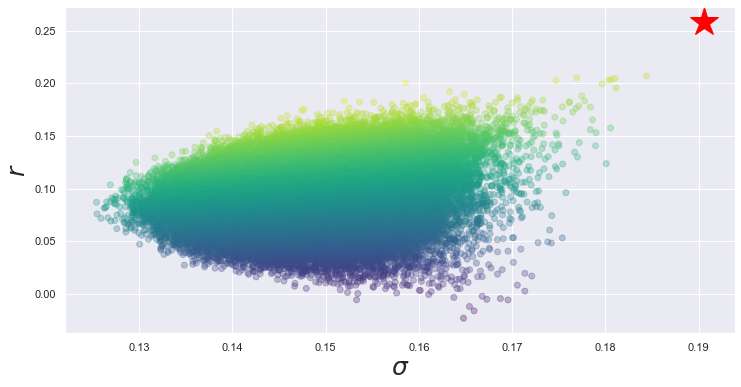

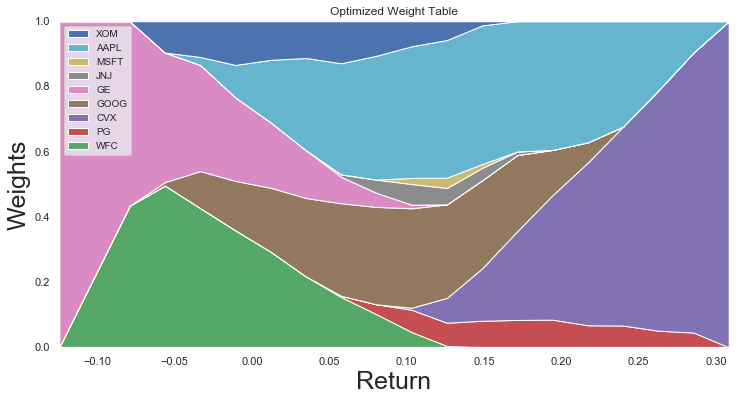

Optimization based on Equilibrium returns
Name       Weight Return    Dev    Correlations
XOM         16.0%   9.5%  19.0%    1.000 
AAPL        15.6%  11.9%  24.7%    0.347 1.000 
MSFT        11.2%  11.8%  23.4%    0.391 0.563 1.000 
JNJ          9.7%   6.9%  16.1%    0.412 0.312 0.409 1.000 
GE           9.4%  10.4%  27.7%    0.348 0.277 0.280 0.219 1.000 
GOOG        11.6%  11.2%  24.1%    0.335 0.507 0.648 0.341 0.259 1.000 
CVX          9.2%  10.4%  22.4%    0.784 0.315 0.400 0.349 0.344 0.293 1.000 
PG           8.5%   6.0%  15.3%    0.358 0.272 0.364 0.440 0.231 0.276 0.318 1.000 
WFC          8.7%   9.2%  20.8%    0.472 0.355 0.432 0.379 0.340 0.364 0.436 0.257 1.000 


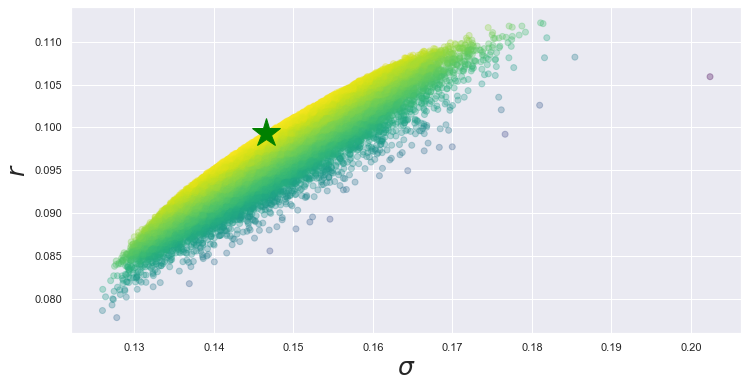

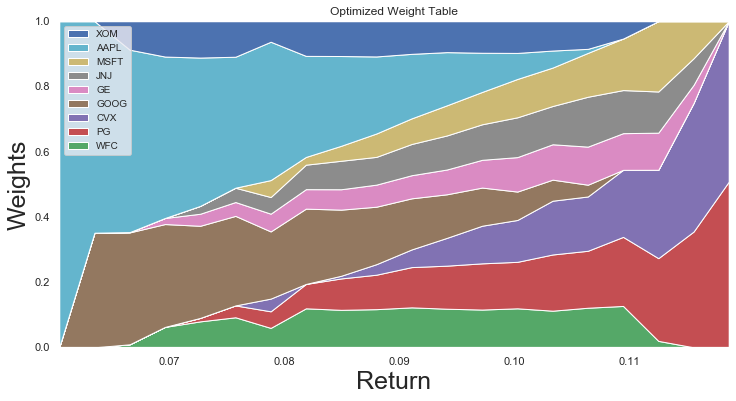

Views Matrix
[0.02 0.02]
Link Matrix
[[ 0.  0.  1.  0. -1.  0.  0.  0.  0.]
 [ 0. -1.  0.  1.  0.  0.  0.  0.  0.]]
Optimization based on Equilibrium returns with adjusted views
Name       Weight Return    Dev    Correlations
XOM         16.0%   9.3%  19.0%    1.000 
AAPL         1.2%   9.2%  24.7%    0.347 1.000 
MSFT        13.2%  11.1%  23.4%    0.391 0.563 1.000 
JNJ         24.1%   7.7%  16.1%    0.412 0.312 0.409 1.000 
GE           7.5%   9.4%  27.7%    0.348 0.277 0.280 0.219 1.000 
GOOG        11.6%  10.4%  24.1%    0.335 0.507 0.648 0.341 0.259 1.000 
CVX          9.2%  10.1%  22.4%    0.784 0.315 0.400 0.349 0.344 0.293 1.000 
PG           8.5%   6.1%  15.3%    0.358 0.272 0.364 0.440 0.231 0.276 0.318 1.000 
WFC          8.7%   8.9%  20.8%    0.472 0.355 0.432 0.379 0.340 0.364 0.436 0.257 1.000 


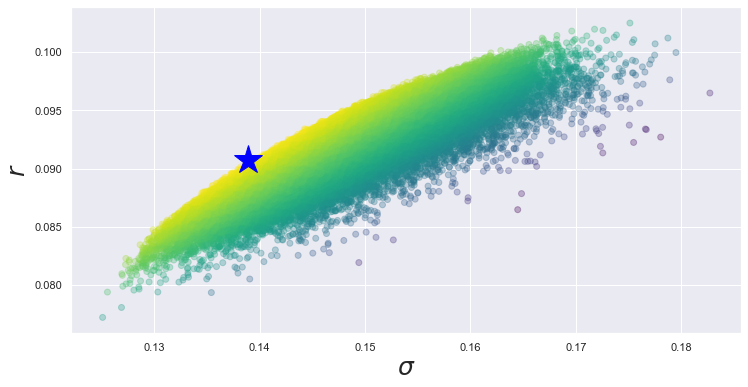

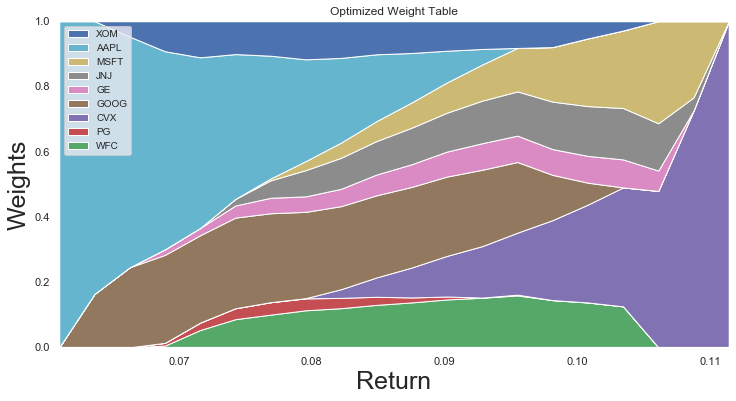

In [100]:
from numpy import matrix, array, zeros, empty, sqrt, ones, dot, append, mean, cov, transpose, linspace
from numpy.linalg import inv, pinv
from pylab import *
import seaborn as sns
sns.set()
#from structures.quote import QuoteSeries
import scipy.optimize
import random
import pandas as pd
####################################
# Helper Functions
####################################

def load_data_net():
    symbols = ['XOM', 'AAPL', 'MSFT', 'JNJ', 'GE', 'GOOG', 'CVX', 'PG', 'WFC']
    cap = {'XOM': 403.02e9, 'AAPL': 392.90e9, 'MSFT': 283.60e9, 'JNJ': 243.17e9, 'GE': 236.79e9,
           'GOOG': 292.72e9, 'CVX': 231.03e9, 'PG': 214.99e9, 'WFC': 218.79e9}
  #  n = len(symbols)
    prices_out, caps_out = [], []
    for s in symbols:
        dataframe = pd.read_csv('US_price/%s_price.csv' % s, index_col=None)
        prices = list(dataframe[s])[-1250:] # trailing window 500 days
        prices_out.append(prices)
        caps_out.append(cap[s])
    return symbols, prices_out, caps_out

names, prices, caps = load_data_net()

from numpy import matrix, array, zeros, empty, sqrt, ones, dot, append, mean, cov, transpose, linspace
from numpy.linalg import inv, pinv
from pylab import *
#from structures.quote import QuoteSeries
import scipy.optimize
import random
from math import log, exp

####################################
# Helper Functions
####################################
# Function takes historical stock prices together with market capitalizations and calculates
# names       - array of assets' names
# prices      - array of historical (daily) prices
# caps        - array of assets' market capitalizations
# returns:
# names       - array of assets' names
# weights     - array of assets' weights (derived from mkt caps)
# expreturns  - expected returns based on historical data
# covars          - covariance matrix between assets based on historical data
def assets_meanvar(names, prices, caps):
        prices = matrix(prices)                         # create numpy matrix from prices
        weights = array(caps) / sum(caps)       # create weights

        # create matrix of historical returns
        rows, cols = prices.shape
        returns = empty([rows, cols-1])
        for r in range(rows):
                for c in range(cols-1):
                        p0, p1 = prices[r,c], prices[r,c+1]
                        returns[r,c] = (p1/p0)-1

        # calculate expected returns
        expreturns = array([])
        for r in range(rows):
                expreturns = append(expreturns, mean(returns[r]))
        # calculate covariances
        covars = cov(returns)

        expreturns = (1 + expreturns)**250-1      # Annualize expected returns
        covars = covars * 250                           # Annualize covariances

        return names, weights, expreturns, covars
    
#       rf              risk free rate
#       lmb             lambda - risk aversion coefficient
#       C               assets covariance matrix
#       V               assets variances (diagonal in covariance matrix)
#       W               assets weights
#       R               assets returns
#       mean    portfolio historical return
#       var             portfolio historical variance
#       Pi              portfolio equilibrium excess returns
#       tau     scaling factor for Black-litterman

# Calculates portfolio mean return
def port_mean(W, R):
        return sum(R * W)

# Calculates portfolio variance of returns
def port_var(W, C):
        return dot(dot(W, C), W)

# Combination of the two functions above - mean and variance of returns calculation
def port_mean_var(W, R, C):
        return port_mean(W, R), port_var(W, C)

# Given risk-free rate, assets returns and covariances, this function calculates
# mean-variance frontier and returns its [x,y] points in two arrays
def solve_frontier(R, C, rf):
        def fitness(W, R, C, r):
                # For given level of return r, find weights which minimizes
                # portfolio variance.
                mean, var = port_mean_var(W, R, C)
                # Big penalty for not meeting stated portfolio return effectively serves as optimization constraint
                penalty = 50*abs(mean-r) #r은 optimized return
                return var + penalty
        frontier_mean, frontier_var, frontier_weights = [], [], []
        n = len(R)      # Number of assets in the portfolio
        for r in linspace(min(R), max(R), num=20): # Iterate through the range of returns on Y axis
                W = ones([n])/n         # start optimization with equal weights
                b_ = [(0,1) for i in range(n)]
                c_ = ({'type':'eq', 'fun': lambda W: sum(W)-1. })
                optimized = scipy.optimize.minimize(fitness, W, (R, C, r), method='SLSQP', constraints=c_, bounds=b_)
                if not optimized.success:
                        raise BaseException(optimized.message)
                # add point to the min-var frontier [x,y] = [optimized.x, r]
                frontier_mean.append(r)                                                 # return
                frontier_var.append(port_var(optimized.x, C))   # min-variance based on optimized weights
                frontier_weights.append(optimized.x)
        return array(frontier_mean), array(frontier_var), frontier_weights
                                                                                                       
# Given risk-free rate, assets returns and covariances, this
# function calculates weights of tangency portfolio with respect to
# sharpe ratio maximization
def solve_weights(R, C, rf):
        def fitness(W, R, C, rf):
                mean, var = port_mean_var(W, R, C)      # calculate mean/variance of the portfolio
                util = (mean - rf) / sqrt(var)          # utility = Sharpe ratio
                return 1/util                                           # maximize the utility, minimize its inverse value
        n = len(R)
        W = ones([n])/n                                         # start optimization with equal weights
        b_ = [(0.,1.) for i in range(n)]        # weights for boundaries between 0%..100%. No leverage, no shorting
        c_ = ({'type':'eq', 'fun': lambda W: sum(W)-1. })       # Sum of weights must be 100%
        optimized = scipy.optimize.minimize(fitness, W, (R, C, rf), method='SLSQP', constraints=c_, bounds=b_)
        if not optimized.success:
                raise BaseException(optimized.message)
        return optimized.x

def print_assets(names, W, R, C):
        print("%-10s %6s %6s %6s %s" % ("Name", "Weight", "Return", "Dev", "   Correlations"))
        for i in range(len(names)):
                print("%-10s %5.1f%% %5.1f%% %5.1f%%    " % (names[i], 100*W[i], 100*R[i], 100*C[i,i]**.5), end='')
                for j in range(i+1):
                        corr = C[i,j] / (sqrt(C[i,i]) * (sqrt(C[j,j]))) # calculate correlation from covariance
                        print("%.3f " % corr, end='')
                print()


        
                
def optimize_and_display(title, names, R, C, rf, color='red'):
        # optimize
        W = solve_weights(R, C, rf)
        mean, var = port_mean_var(W, R, C)                              # calculate tangency portfolio
        f_mean, f_var, f_weights = solve_frontier(R, C, rf)             # calculate min-var frontier
        # display min-var frontier
        print(title)
        figure(figsize=(12,6))
        print_assets(names, W, R, C)
        n = len(names)
        ###draw assets### 
        #scatter([sqrt(C[i,i]) for i in range(n)], R, cmap='viridis', marker='x',color=color)  # draw assets
        # for i in range(n):  # draw labels
        #        text(sqrt(C[i,i]), R[i], '  %s'%names[i], verticalalignment='center', color=color,fontsize= 10)
        
        plot(sqrt(var), mean, marker='*', color=color, markersize =30)  # point tangency portfolio
        #scatter(var**.5, mean, marker='o', color=color) # draw tangency portfolio
        
        #plot(sqrt(f_var), f_mean, color=color, marker="*", markersize=10) # draw min-var frontier
        
        xlabel('$\sigma$', fontsize=25), ylabel('$r$', fontsize=25)
        
        # Conducted Random Portfolio scatter 
        RandomReturn, RandomVar = [], []
        for i in range(100000):
            weight = np.random.random(9) 
            weight = weight/sum(weight)
            RandomReturn.append(port_mean(weight, R))
            RandomVar.append(sqrt(port_var(weight,C)))
        RandomReturn = array(RandomReturn)
        RandomVar = array(RandomVar)
        scatter(RandomVar, RandomReturn, c = (RandomReturn-rf)/RandomVar, cmap='viridis', marker = 'o' ,alpha = 0.3 )
        grid(True)
        show()
        
        #Display weights
        m = empty([n, len(f_weights)]) # num = 20개 solve_frontier 함수에서 최적화 개수(r, linspace)
        for i in range(n): # 9
            for j in range(m.shape[1]): #20, shape[0]은 행 shape[1] 은 열
                m[i,j] = f_weights[j][i]        
    
        figure(figsize=(12,6))
    
        for i in range(n) :
            stackplot(f_mean, m, labels=[names[i]])
        margins(0,0)
        legend(loc = 'upper left', fontsize = 10)
        plt.title("Optimized Weight Table")
        xlabel('Return', fontsize=25)
        ylabel('Weights', fontsize=25)
        show()
    


# given the pairs of assets, prepare the views and link matrices. This function is created just for users' convenience
def prepare_views_and_link_matrix(names, views):
    
        r, c = len(views), len(names)
        Q = [views[i][3] for i in range(r)]     # view matrix
        P = zeros([r, c])                                       # link matrix
        nameToIndex = dict()
        for i, n in enumerate(names):
                nameToIndex[n] = i
        for i, v in enumerate(views):
                name1, name2 = views[i][0], views[i][2]
                P[i, nameToIndex[name1]] = +1 if views[i][1]=='>' else -1
                P[i, nameToIndex[name2]] = -1 if views[i][1]=='>' else +1
        return array(Q), P

####################################
# Main
####################################
 
# Load names, prices, capitalizations from the data source(yahoo finance)
names, prices, caps = load_data_net()
n = len(names)

# Estimate assets's expected return and covariances
names, W, R, C = assets_meanvar(names, prices, caps)
rf = .015       # Risk-free rate

print("Historical Weights")
print_assets(names, W, R, C)

# Calculate portfolio historical return and variance
mean, var = port_mean_var(W, R, C)

# Mean-Variance Optimization (based on historical returns)
print("="*100)
optimize_and_display('Optimization based on Historical returns', names, R, C, rf, color='red')
show()

# Black-litterman reverse optimization
lmb = (mean - rf) / var                         # Calculate return/risk trade-off
Pi = dot(dot(lmb, C), W)                        # Calculate equilibrium excess returns

# Mean-variance Optimization (based on equilibrium returns)
print("="*100)
optimize_and_display('Optimization based on Equilibrium returns', names, Pi+rf, C, rf, color='green')
show()

# Determine views to the equilibrium returns and prepare views (Q) and link (P) matrices
views = [
        ('MSFT', '>', 'GE', 0.02),
        ('AAPL', '<', 'JNJ', 0.02)
        ]

Q, P = prepare_views_and_link_matrix(names, views)
print('Views Matrix')
print(Q)
print('Link Matrix')
print(P)

tau = .025 # scaling factor

# Calculate omega - uncertainty matrix about views
omega = dot(dot(dot(tau, P), C), transpose(P)) # 0.025 * P * C * transpose(P)
# Calculate equilibrium excess returns with views incorporated
sub_a = inv(dot(tau, C))
sub_b = dot(dot(transpose(P), inv(omega)), P)
sub_c = dot(inv(dot(tau, C)), Pi)
sub_d = dot(dot(transpose(P), inv(omega)), Q)
Pi = dot(inv(sub_a + sub_b), (sub_c + sub_d))

# Mean-variance Optimization (based on equilibrium returns)
print("="*100)
optimize_and_display('Optimization based on Equilibrium returns with adjusted views', names, Pi+rf, C, rf, color='blue')
show()



In [2]:
git push

SyntaxError: invalid syntax (<ipython-input-2-83a80d2515aa>, line 1)